In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [ ]:
NxN = pd.read_csv('../../../extracted_data/NxN_imputed_10.csv', sep = ',', index_col = 0)

embeddings = pd.read_csv('../../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')

R2:  -941011.2768808709
RMSE: 72.72595656817553


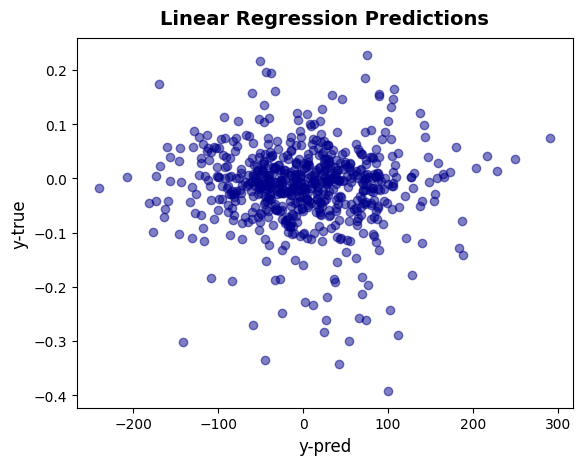

In [3]:
random.seed(41)

target_column = random.choice(NxN.columns)  # Randomly pick a column name

# Align embeddings with interaction row
df = embeddings.merge(NxN[[target_column]], left_index=True, right_index=True, how='inner')
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

In [4]:
print(target_column)

DMA_YAR029W


0.999996868503314


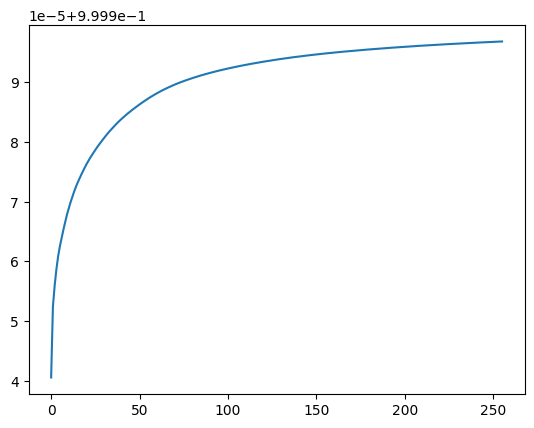

In [5]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [6]:
dims = 1024
NxN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
NxN_PCA

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-3318.568398,-1.222918,-3.686034,-0.018961,-1.668824,0.287457,0.182050,-2.437218,-0.192888,-1.826369,...,-0.001783,0.020722,-0.034282,-0.028602,0.021245,-0.094342,0.032660,0.034267,0.036956,0.017977
1,-3315.568554,-1.206275,-4.146575,-3.126900,-5.856118,-1.322584,-1.552587,-2.040486,0.649940,0.780373,...,0.004953,0.014120,0.056521,0.045591,0.007329,0.046835,0.039271,0.072769,0.001974,0.085701
2,-3314.568142,-1.868523,1.207816,2.599901,-3.059435,-2.549786,1.912357,0.938573,1.807855,-2.039547,...,0.016428,0.002622,-0.005161,0.026253,-0.003074,0.074727,-0.000866,-0.036909,-0.009341,0.079892
3,-3313.568202,-8.388212,2.583108,1.911844,-3.539825,2.541101,0.761062,0.137847,-1.303223,-0.838213,...,-0.031320,0.054759,-0.028752,-0.007427,0.082696,0.015706,0.083766,-0.009791,-0.013295,-0.057828
4,-3312.569246,15.332463,1.706354,-2.853658,2.892266,0.096820,0.649066,3.233353,-1.111294,-2.303982,...,-0.027221,0.089895,-0.007080,0.004569,-0.019533,-0.024161,0.002182,0.019604,0.063696,-0.029325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,3245.432117,-10.187902,0.824119,-3.787269,1.790927,-1.540248,-3.559665,-0.294555,-2.844171,-2.039057,...,-0.026363,-0.067100,-0.048752,-0.022906,0.092003,0.085675,-0.004575,-0.038473,0.002431,0.040572
3266,3248.432156,-4.389653,-0.506052,5.208242,1.988165,-0.130398,-0.095477,-1.804302,-0.575452,-1.225414,...,0.044477,0.079101,0.030921,0.080482,-0.052006,-0.005484,0.032261,-0.065314,0.029417,0.092052
3267,3253.431740,8.248401,-5.097666,-0.727069,0.153644,-1.622346,-0.613102,0.865801,-1.663449,0.328655,...,0.082709,0.043577,0.026467,-0.093135,0.131980,0.054230,-0.015265,-0.094492,-0.104961,-0.119385
3268,3254.431670,6.556597,-1.094292,0.336217,4.440683,2.093214,-2.158503,-3.163870,1.952234,-1.670380,...,0.016884,-0.022883,0.014912,-0.018840,-0.099127,-0.033946,-0.006011,-0.046595,-0.011250,-0.001532


R2:  -0.7870616101326593
RMSE: 0.10022165270441034


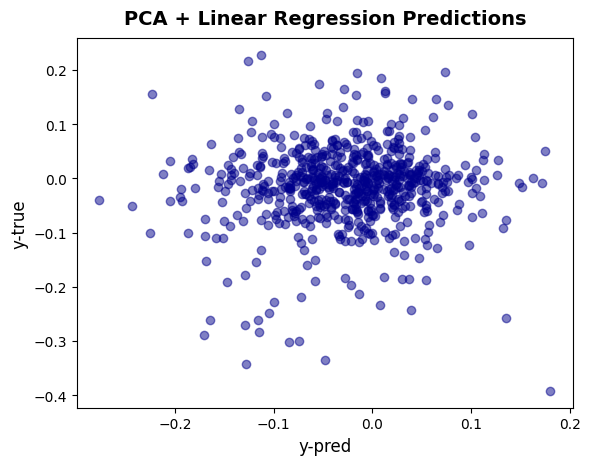

In [7]:
X_train, X_test, y_train, y_test = train_test_split(NxN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e-02, tolerance: 1.852e-03
  model = cd_fast.enet_coordinate_descent(


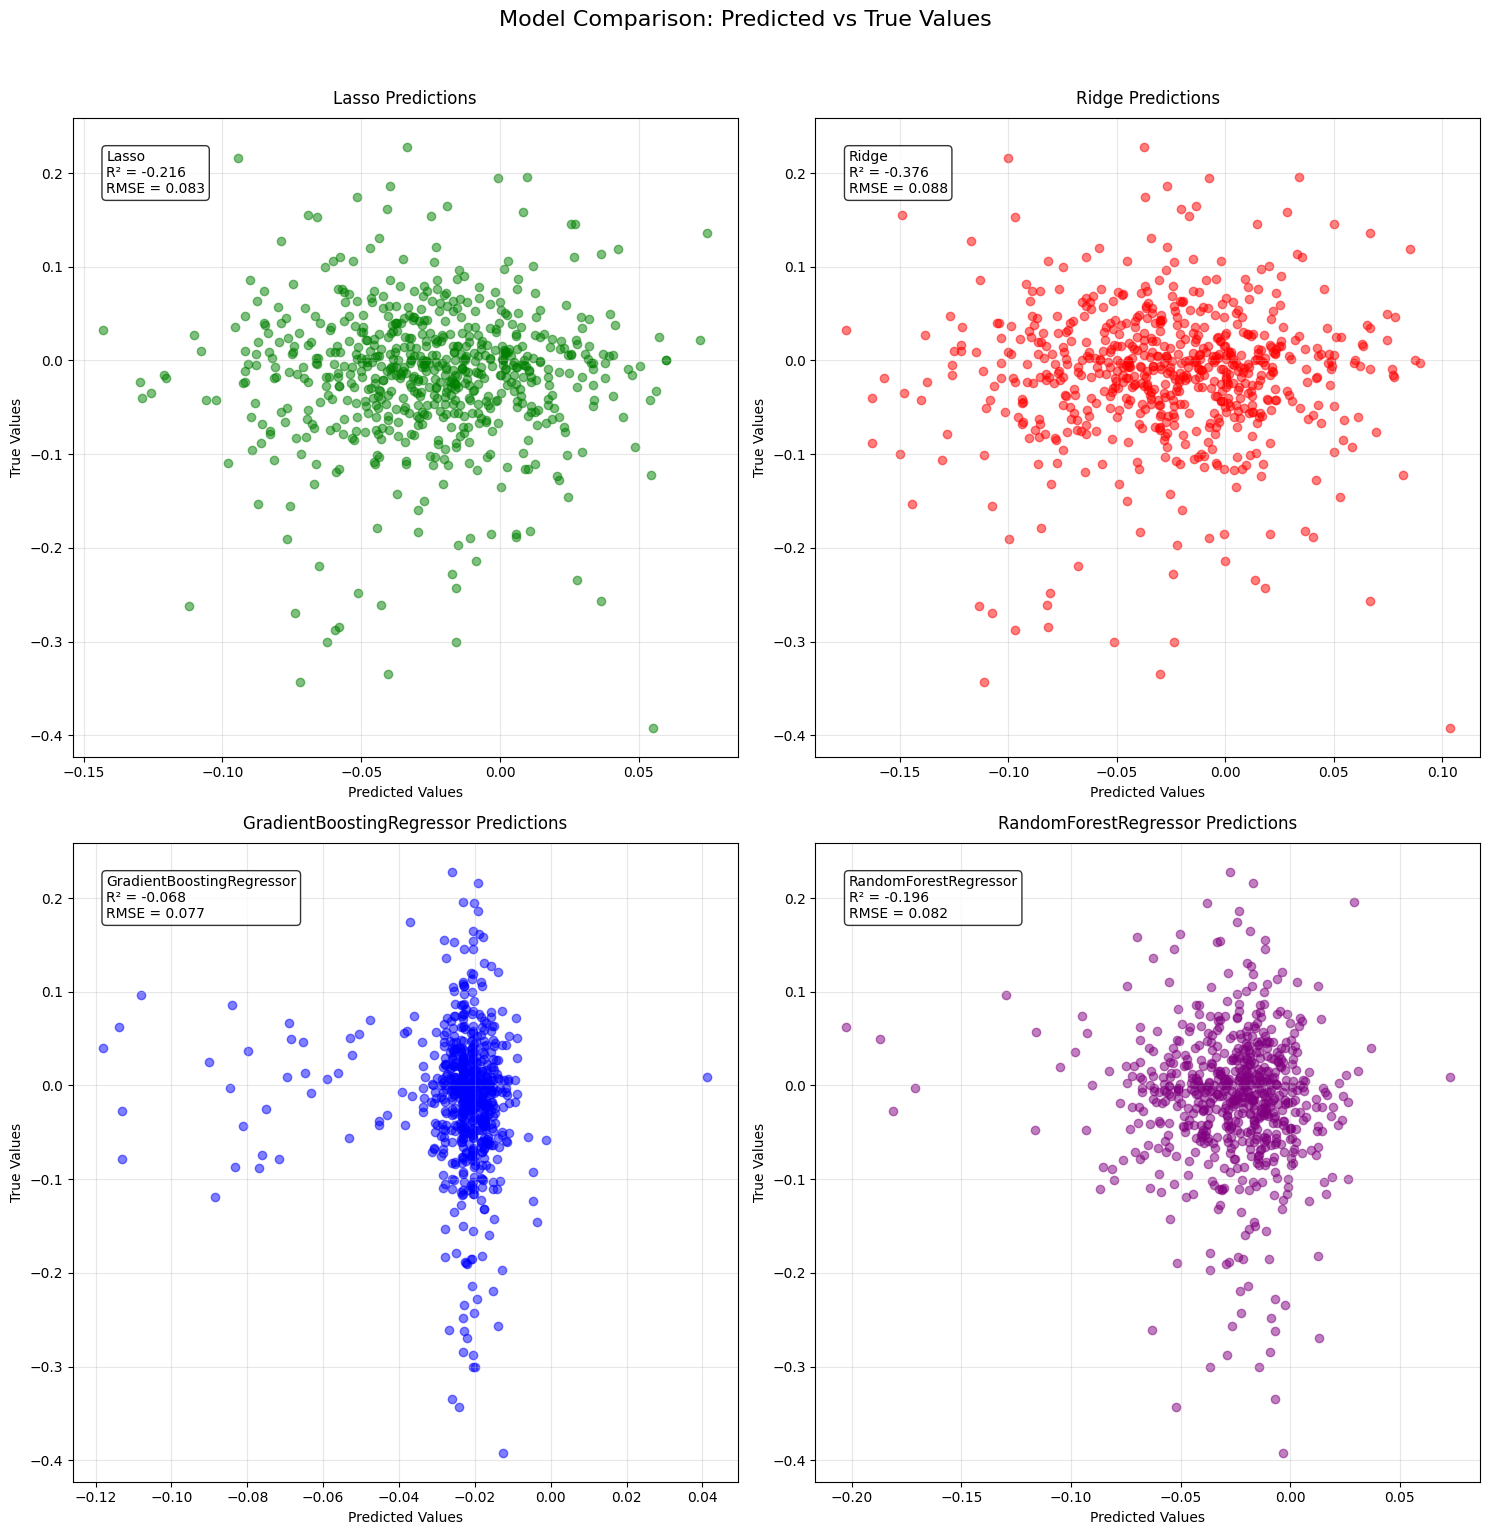

In [8]:
predictive_models = [ 
                      Lasso(alpha=0.0001), 
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42),

]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.1603 - mse: 11.1603 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mse

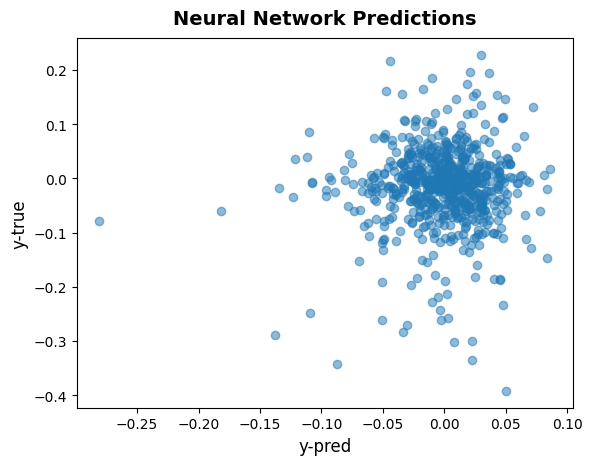

In [9]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()